# **Presentación del proyecto**

**Modelo para predicción de ACV**

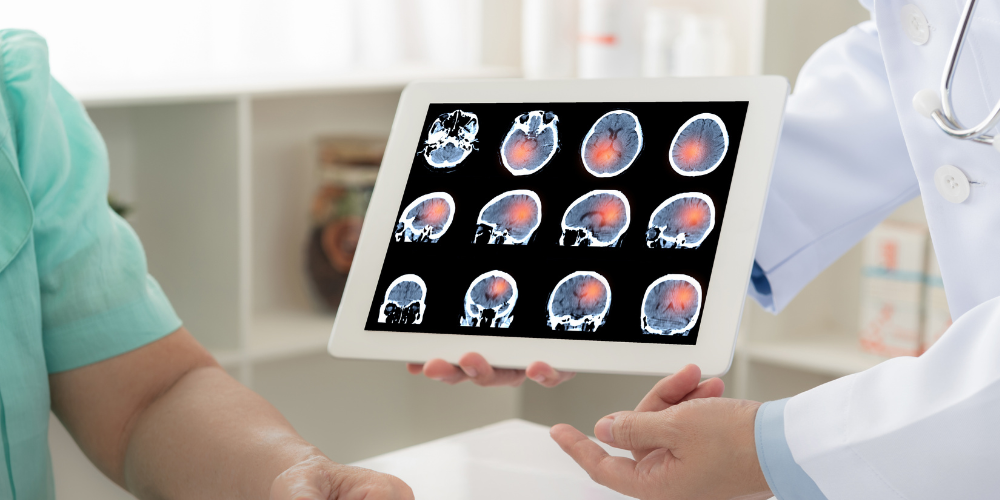

**Abstracto con Motivación y Audiencia**

El accidente cerebrovascular (ACV) es una condición grave en la que se produce una interrupción en el flujo sanguíneo hacia el cerebro, lo que resulta en daño cerebral y discapacidad. La Organización Mundial de la Salud (OMS) lo identifica como la segunda causa principal de muerte a nivel mundial, siendo responsable de aproximadamente el 11% de todas las muertes. Este conjunto de datos se utiliza para predecir la probabilidad de que un individuo sufra un ACV basándose en varios factores, como el sexo, la edad, diversas condiciones médicas y el hábito de fumar. La capacidad de predecir el ACV en función de los hábitos de las personas puede ayudar a identificar patrones que se deben evitar, lo que a su vez puede contribuir a minimizar el riesgo de desarrollar esta afección. Esta predicción no solo es beneficiosa a nivel individual, sino que también puede resultar en ahorros significativos de recursos económicos que la sociedad destina al tratamiento de esta enfermedad.

La motivación detrás de este proyecto radica en la necesidad de abordar y prevenir una condición médica grave y prevalente, como es el accidente cerebrovascular (ACV). Dado que el ACV es una de las principales causas de discapacidad y muerte en todo el mundo, existe un interés significativo en desarrollar herramientas predictivas que puedan identificar a las personas con mayor riesgo de sufrir un ACV. Esto no solo puede ayudar a mejorar la calidad de vida de los individuos al prevenir eventos catastróficos como el ACV, sino que también puede contribuir a reducir la carga económica y social asociada con su tratamiento y rehabilitación.

La audiencia de este proyecto abarcaría desde profesionales de la salud hasta individuos y organizaciones interesadas en la promoción de la salud y la prevención de enfermedades cardiovasculares.

**Contexto Comercial y Analítico**

En un entorno empresarial, se plantea la necesidad de prevenir el accidente cerebrovascular (ACV), una carga importante en términos de salud y recursos económicos. Surge la pregunta de si, con variables clínicas de fácil medición, es posible predecir la ocurrencia de un ACV. Esto tiene implicaciones para la industria de la salud y las aseguradoras, ya que una predicción precisa podría mejorar la asignación de recursos y las intervenciones preventivas.

El conjunto de datos, consta de 11 características clínicas, estas incluyen edad, sexo, IMC, presión arterial, tabaquismo, entre otras.

Haciendo un anlisis exploratorio de datos y utilizando técnicas de machine learning, se busca construir un modelo que pueda predecir el riesgo de ACV en pacientes individuales. La idea es proporcionar a los profesionales de la salud una herramienta para la prevención y el manejo efectivo de esta enfermedad.

**Fuente**

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv

**Preguntas/Hipótesis a Resolver mediante el Análisis de Datos**

Dadas ciertas características clínicas y de estilo de vida de un individuo, es posible predecir si esa persona tiene un riesgo elevado de sufrir un accidente cerebrovascular (ACV)

**Objetivo**

El objetivo principal del proyecto es desarrollar un modelo de machine learning que pueda predecir con precisión la probabilidad de que una persona sufra un accidente cerebrovascular (ACV) basándose en diversas características clínicas y de estilo de vida.

Para lograr este objetivo, podríamos utilizar un enfoque de **clasificación binaria**, donde el modelo intentará predecir si un individuo tiene un alto riesgo de ACV con la variable objetivo **Stroke** (1 si el paciente sufrio ACV y 0 si no sufrio ACV).

Un modelo adecuado para implementar es **Logistic Regression**, podriamos tambien probar otros como KNN, Random Forest o Support Vector Machines.

# **Lectura de datos**

**Librerias necesarias para el analisis de datos**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")

**Configuración del entorno de Python en Google Colab**

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
print(os.getcwd())
os.chdir("/content/drive/My Drive/Coderhouse_desafios")
print(os.getcwd())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Coderhouse_desafios
/content/drive/My Drive/Coderhouse_desafios


**Lectura del dataset**

In [ ]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQHKrR2P-CPVKCg6E__bUvgWYta9dEP14arcLTS24x2XgDR-IIWqzRiaUBcR4Ij1__Q2KXO-2sfeTwq/pub?output=csv')

**Análisis inicial del dataset**

In [ ]:
df.shape

(5110, 12)

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.sample(7)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3320,70674,Male,60.0,0,0,Yes,Self-employed,Urban,69.53,26.2,never smoked,0
1074,43146,Male,8.0,0,0,No,children,Urban,106.40,18.3,Unknown,0
1434,67217,Female,45.0,0,0,Yes,Private,Urban,92.86,35.1,formerly smoked,0
2353,27849,Female,5.0,0,0,No,children,Urban,122.25,16.7,Unknown,0
3580,1656,Male,38.0,0,0,Yes,Private,Urban,92.22,40.8,never smoked,0
970,10538,Male,75.0,1,1,Yes,Self-employed,Urban,195.03,28.7,formerly smoked,0
2987,20006,Female,15.0,0,0,No,Private,Urban,76.77,21.7,Unknown,0


In [ ]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

**Descripción de variables**

**ID:** Identificación única del paciente.

**Gender:** Género del paciente (masculino, femenino u otro).

**Age:** Edad del paciente en años.

**Hypertensión:** Si el paciente tiene hipertensión (0 si no, 1 si sí).

**Heart_disease:** Si el paciente tiene enfermedad cardíaca (0 si no, 1 si sí).

**Ever_merried:** Si el paciente está casado o no.

**Work_type:** El tipo de trabajo del paciente (por ejemplo, privado, autónomo, etc.).

**Recidence_type:** El tipo de residencia del paciente (urbana o rural).

**Avg_glucose_level:** El nivel promedio de glucosa en sangre del paciente.

**BMI:** Índice de Masa Corporal del paciente.

**Smoking_status:** El estado de fumador del paciente (por ejemplo, fumador actual, ex fumador o nunca fumador).

**Stroke:** Variable objetivo, si el paciente sufrió un accidente cerebrovascular (0 si no, 1 si sí).

In [ ]:
df.dtypes.value_counts()

object     5
int64      4
float64    3
Name: count, dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [ ]:
df.describe(include=['object']).T

,count,unique,top,freq
gender,5110,3,Female,2994
ever_married,5110,2,Yes,3353
work_type,5110,5,Private,2925
Residence_type,5110,2,Urban,2596
smoking_status,5110,4,never smoked,1892


# **Limpieza y transformación de datos**

**Valores duplicados**

In [ ]:
df.duplicated().sum()

0

**Valores nulos**

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.fillna(df['bmi'].mean(), inplace=True)

**Valores outliers**

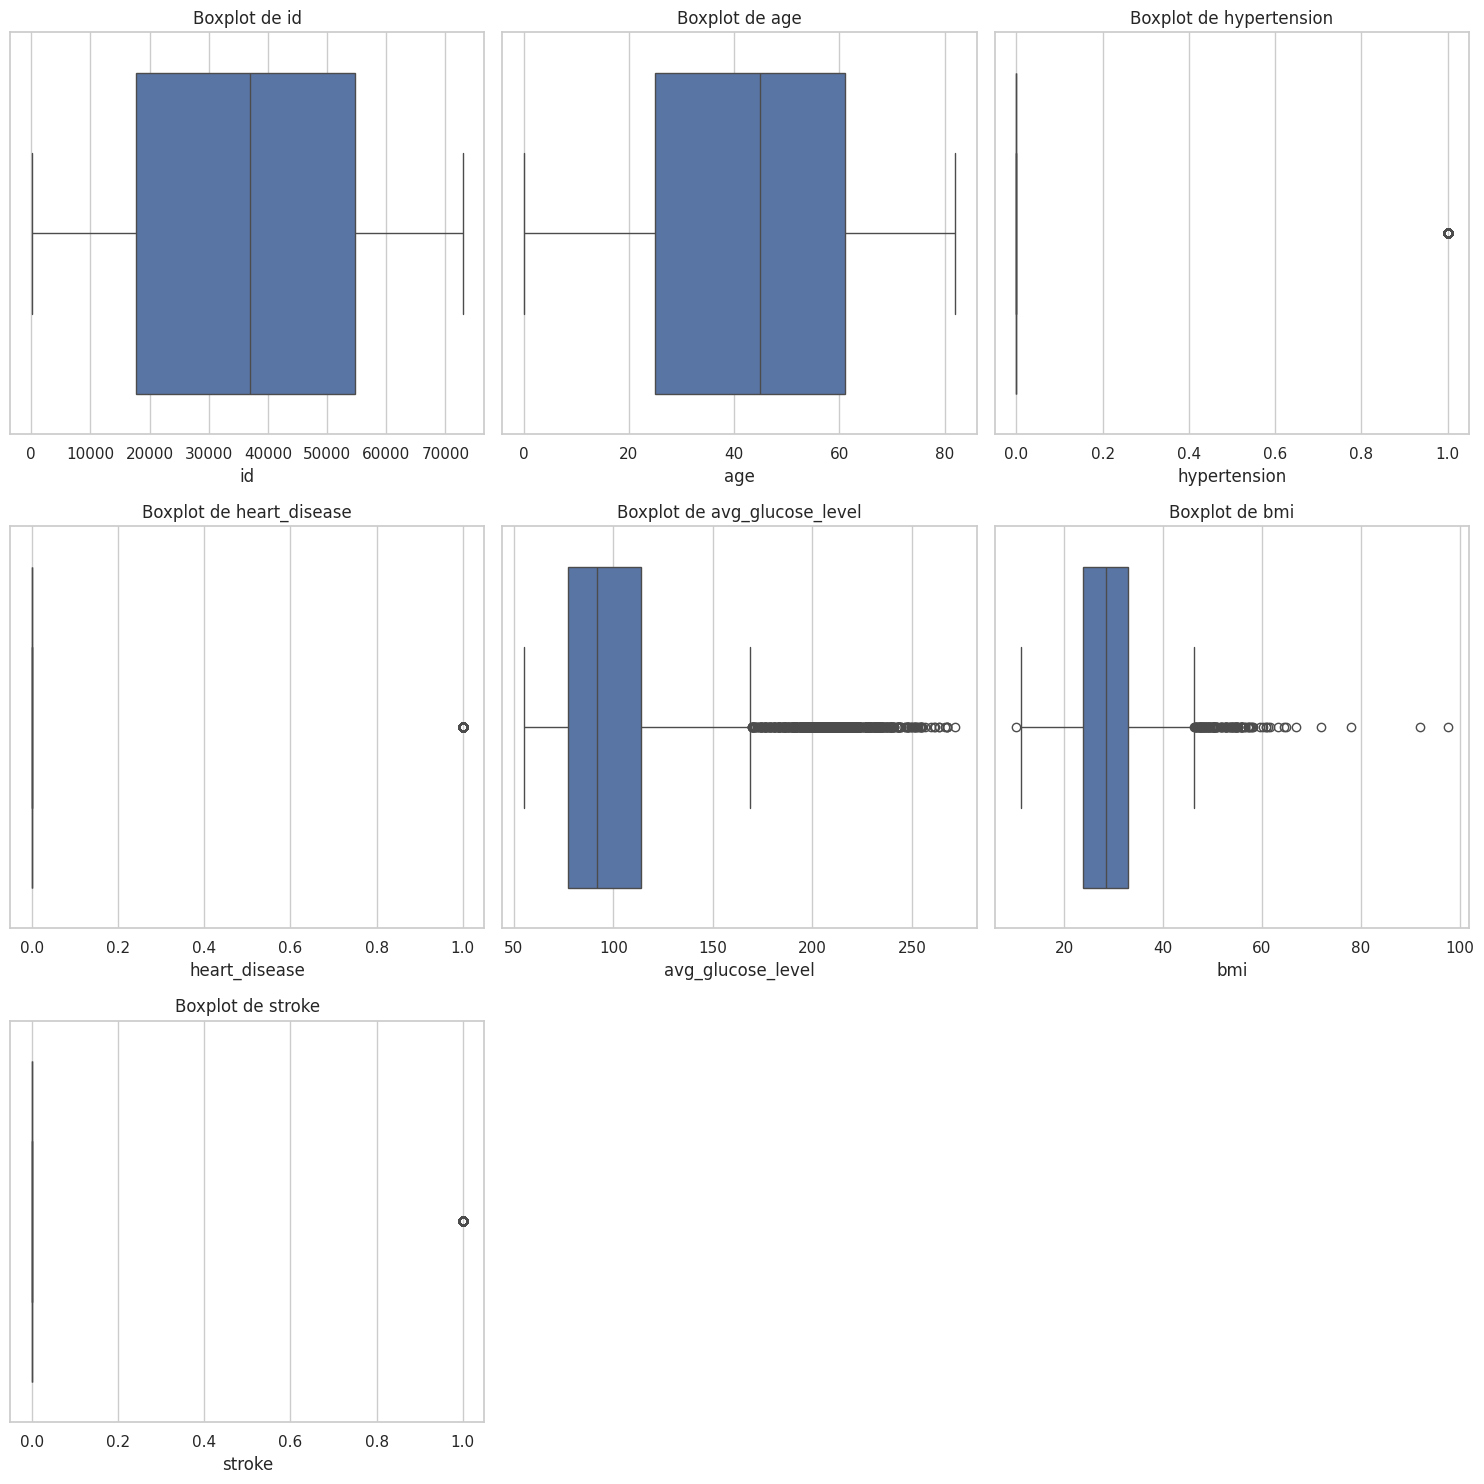

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

# Calcular el número de filas y columnas para los subgráficos
num_vars = len(numeric_columns.columns)
num_rows = (num_vars // 3) + (1 if num_vars % 3 > 0 else 0)
num_cols = min(num_vars, 3)

# Configurar el tamaño de la figura
plt.figure(figsize=(15, 5*num_rows))

# Generar y mostrar los diagramas de caja para cada variable numérica
for i, col in enumerate(numeric_columns.columns):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x=df[col])
    plt.title("Boxplot de {}".format(col))
    plt.tight_layout()

plt.show()

# **Análisis Exploratorio de datos**

**Análisis univariado**

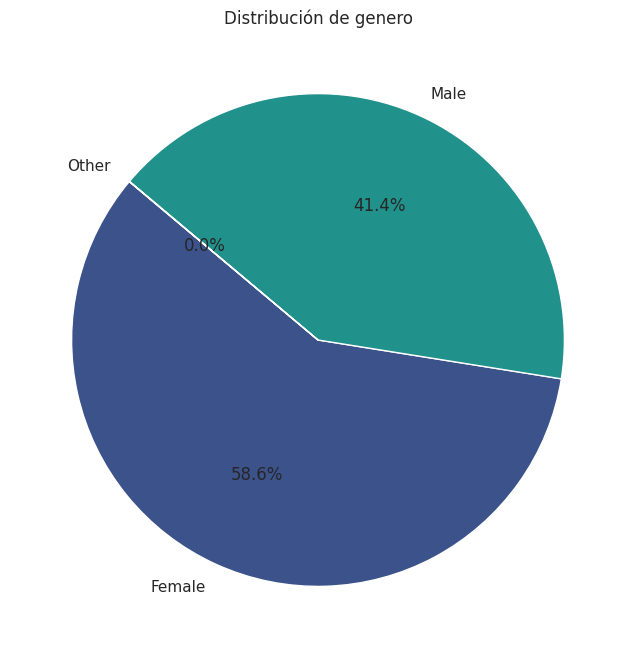

In [ ]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(gender_counts)))

plt.title('Distribución de genero')

plt.show()

**Análisis bivariado**

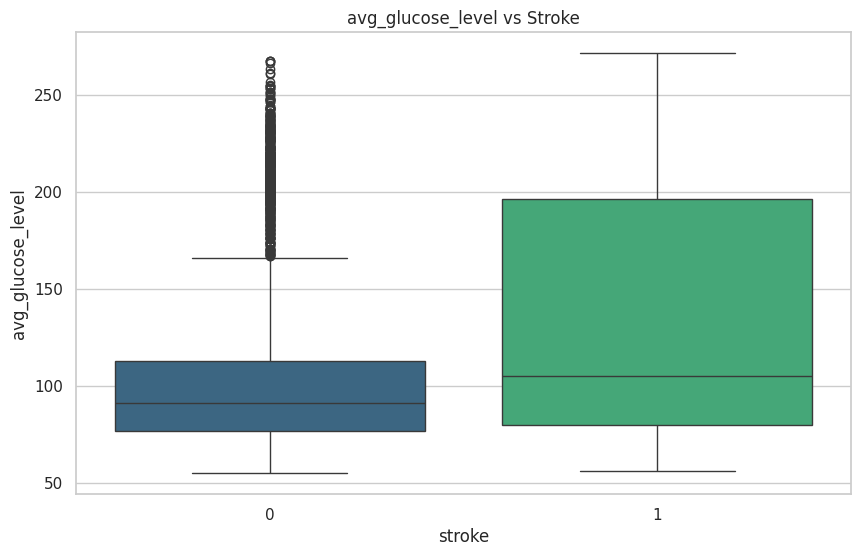

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='stroke', y='avg_glucose_level', data=df, palette="viridis")
plt.title('avg_glucose_level vs Stroke')
plt.show()

El rango intercuartil (IQR) para los individuos sin ACV (grupo ‘0’) es más estrecho que para los que han tenido un ACV (grupo ‘1’). Esto sugiere que hay menos variabilidad en los niveles de glucosa en el grupo sin ACV.
La mediana para el grupo sin ACV sigue siendo más baja que para el grupo con ACV, lo que indica que, en promedio, los niveles de glucosa son más bajos en el grupo sin ACV.


Podemos inferir que niveles más altos de glucosa podrían estar relacionados con un mayor riesgo de ACV

**Análisis multivariado**

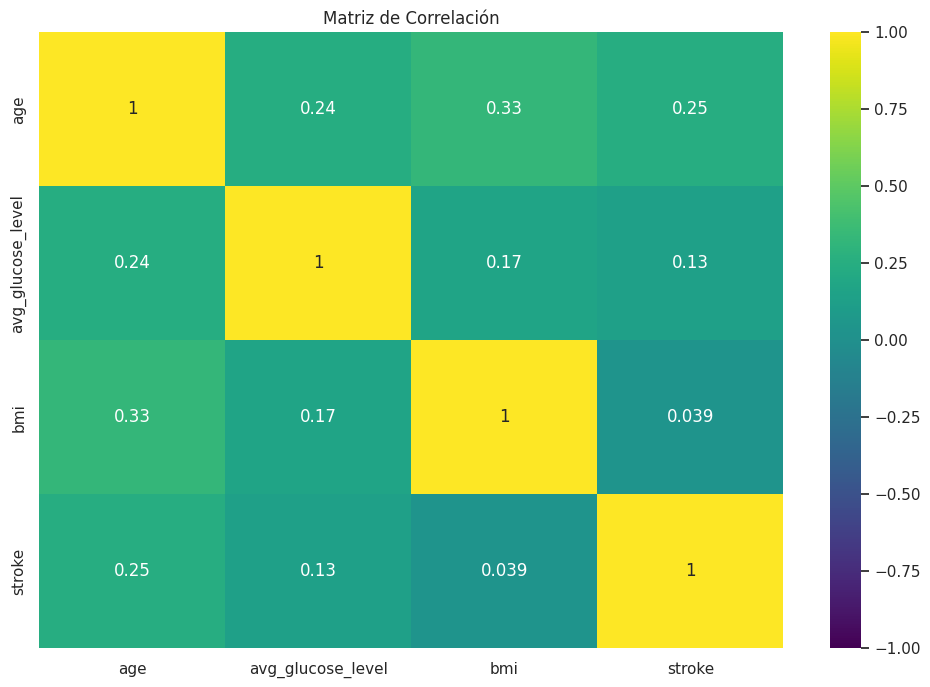

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = df[['age', 'avg_glucose_level', 'bmi', 'stroke']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

**Conclusiones del EDA**

# **Preprocesamiento de datos**

**Codificación de variables categóricas**

In [ ]:
df = pd.get_dummies(df, columns=['smoking_status', 'ever_married', 'work_type', 'Residence_type', 'gender'])
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male,gender_Other
0,9046,67.0,0,1,228.69,36.600000,1,False,True,False,...,False,False,True,False,False,False,True,False,True,False
1,51676,61.0,0,0,202.21,28.893237,1,False,False,True,...,False,False,False,True,False,True,False,True,False,False
2,31112,80.0,0,1,105.92,32.500000,1,False,False,True,...,False,False,True,False,False,True,False,False,True,False
3,60182,49.0,0,0,171.23,34.400000,1,False,False,False,...,False,False,True,False,False,False,True,True,False,False
4,1665,79.0,1,0,174.12,24.000000,1,False,False,True,...,False,False,False,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,80.0,1,0,83.75,28.893237,0,False,False,True,...,False,False,True,False,False,False,True,True,False,False
5106,44873,81.0,0,0,125.20,40.000000,0,False,False,True,...,False,False,False,True,False,False,True,True,False,False
5107,19723,35.0,0,0,82.99,30.600000,0,False,False,True,...,False,False,False,True,False,True,False,True,False,False
5108,37544,51.0,0,0,166.29,25.600000,0,False,True,False,...,False,False,True,False,False,True,False,False,True,False


#**Feature Selection**

**Selección de variable objetivo y variables independientes**

In [ ]:
X = df.drop(['id', 'stroke'], axis=1)
y = df['stroke']

In [ ]:
# Variables independientes
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'gender_Female', 'gender_Male', 'gender_Other'],
      dtype='object')

In [ ]:
# Variable dependiente
y.sample(10)

4725    0
2046    0
941     0
2737    0
2000    0
4286    0
1994    0
1751    0
4429    0
3281    0
Name: stroke, dtype: int64

#**Modelos**

##**Modelo de Regresión logistca**

**Librerias necesarias**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

**División de datos en conjuntos de entrenamiento y prueba**

In [ ]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# Creo el objeto de regresión logistica.
log_reg = LogisticRegression()

# Entreno el modelo con mis datos de entrenamiento
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.97      0.51      0.50      1533
weighted avg       0.95      0.94      0.92      1533



Matriz de confusión:
[[1444    0]
 [  88    1]]


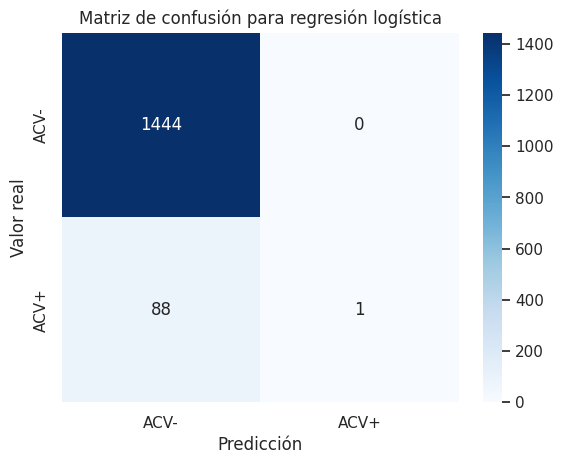

In [ ]:
# Creamos la matriz de confusion
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

# Crear el heatmap
g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d')

# Ajustar las etiquetas del eje x e y
g.set(title='Matriz de confusión para regresión logística', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['ACV-', 'ACV+'])
g.set_yticklabels(['ACV-', 'ACV+'])

plt.show()

#<font color='lightblue'>**Técnica SMOTE para clases desbalanceadas**</font>


<font color='lightblue'>**Técnica SMOTE para clases desbalanceadas**</font>

<font color='lightblue'>**SMOTE (Synthetic Minority Over-sampling Technique)**: es una técnica utilizada para abordar el desbalance de clases en conjuntos de datos de clasificación. Cuando hay un conjunto de datos en el que una clase es significativamente más pequeña que otra, puede llevar a problemas de sesgo en el modelo de aprendizaje automático, donde el modelo puede tener dificultades para aprender patrones en la clase minoritaria.</font>

<font color='lightblue'>**Vemos nuestra variable objetivo**</font>

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

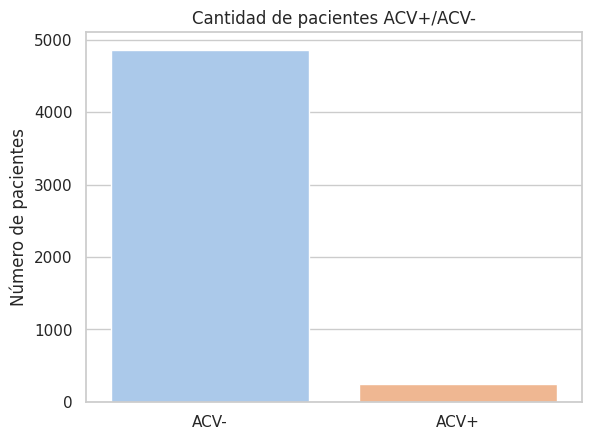

In [ ]:
grafico_barras = sns.countplot(data=df, x='stroke', palette='pastel')
grafico_barras.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
grafico_barras.set_xticklabels(['ACV-', 'ACV+'])

Como es de esperar, hay un menor número de pacientes ACV+. El desbalance puede repercutir negativamente en el entrenamiento y aplicación del modelo. Para solucionar este problema se realiza un balance entre poblaciones por sobremuestreo con la técnica SMOTE.

<font color='lightblue'>**Librerias necesarias**</font>

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

<font color='lightblue'>**División de datos en conjuntos de entrenamiento y prueba**</font>

In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

<font color='lightblue'>**Vemos nuestra variable objetivo balanceada con SMOTE**</font>

[Text(0, 0, 'ACV-'), Text(1, 0, 'ACV+')]

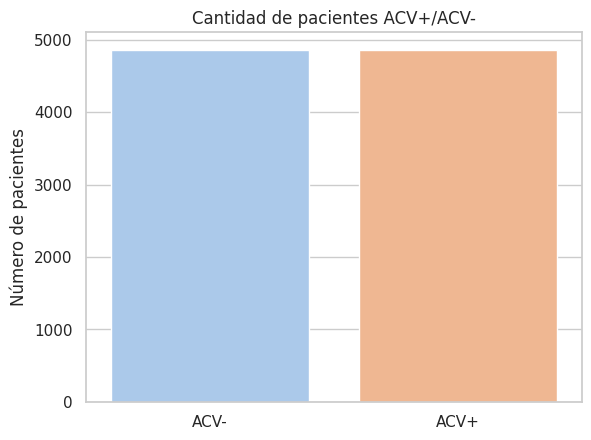

In [ ]:
grafico_smote = sns.countplot(x=y_resampled, palette='pastel')
grafico_smote.set(title='Cantidad de pacientes ACV+/ACV-', ylabel ='Número de pacientes', xlabel='')
grafico_smote.set_xticklabels(['ACV-', 'ACV+'])


<font color='lightblue'>**División de datos en conjuntos de entrenamiento y prueba (SMOTE)**</font>

In [ ]:
# Defino datos de entrenamiento (70%) y datos de prueba(30%) .
# Random_state:Establece una semilla de múmeros aleatorios que asegura que el código sea reproducible cada vez que lo corra.
# shuffle=True: Mezcla el orden de los datos para evitar sesgos.

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42, shuffle=True)

<font color='lightblue'>**Instancia y entrenamiento del modelo de REGRESIÓN LOGISTICA (SMOTE)**</font>

In [ ]:
# Creo el objeto de regresión logistica.
log_reg = LogisticRegression()

# Entreno el modelo con mis datos de entrenamiento
log_reg.fit(X_train, y_train)

LogisticRegression()


<font color='lightblue'>**Predicción con el conjunto de prueba (SMOTE)**</font>

In [ ]:
y_pred = log_reg.predict(X_test)

<font color='lightblue'>**Evaluación del rendimiento del modelo (SMOTE)**</font>

In [ ]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1457
           1       0.99      0.90      0.94      1460

    accuracy                           0.95      2917
   macro avg       0.95      0.95      0.95      2917
weighted avg       0.95      0.95      0.95      2917



Matriz de confusión:
[[1449    8]
 [ 146 1314]]


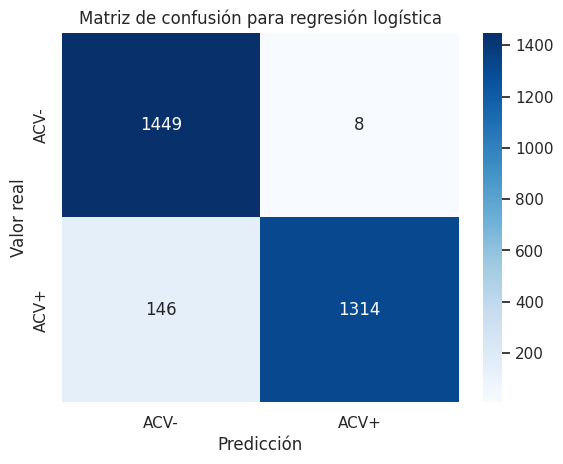

In [ ]:
# Creamos la matriz de confusion
confusion_mtx = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_mtx)

# Crear el heatmap
g = sns.heatmap(confusion_mtx, annot=True, cmap='Blues', fmt='d')

# Ajustar las etiquetas del eje x e y
g.set(title='Matriz de confusión para regresión logística', ylabel ='Valor real', xlabel='Predicción')
g.set_xticklabels(['ACV-', 'ACV+'])
g.set_yticklabels(['ACV-', 'ACV+'])

plt.show()

**Conclusión sobre el modelado y las metricas**

##<font color='lightblue'>**Conclusiones Finales (con SMOTE)**</font>